## Part 2 (a)

In [2]:
import numpy as np
import matplotlib.pyplot as plt

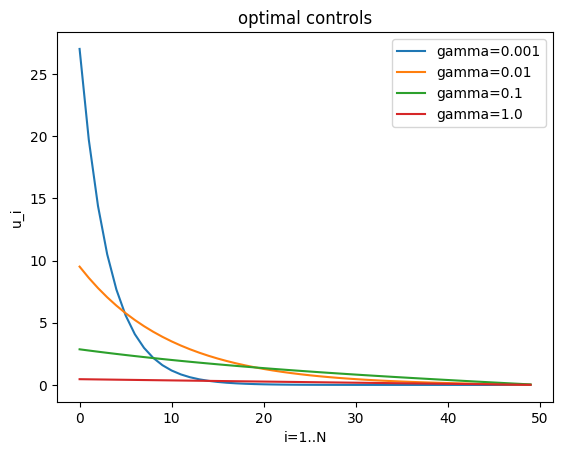

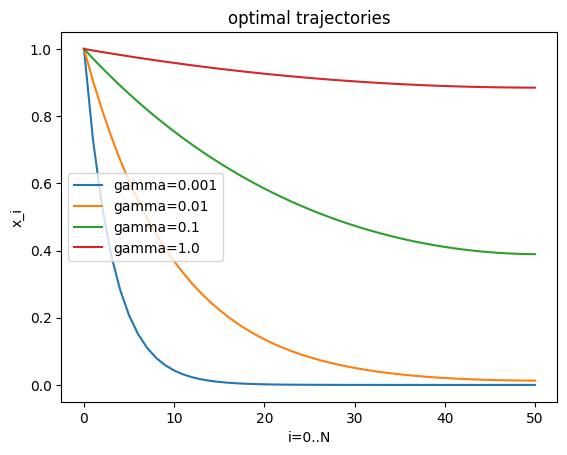

In [8]:
def S_matrix(a, b, N):
    S = np.zeros((N+1, N))
    for i in range(1, N+1):
        for k in range(1, i+1):
            S[i, k-1] = (a**(i-k)) * b
    return S

def d_vec(a, N):
    return np.array([a**i for i in range(N+1)])  # multiplies xbar outside

def solve_u_star(a, b, N, xbar, gamma):
    S = S_matrix(a, b, N)
    d = d_vec(a, N)
    lhs = S.T @ S + gamma * np.eye(N)
    rhs = - S.T @ d * xbar
    u = np.linalg.inv(lhs) @ rhs
    x = xbar * d + S @ u
    return u, x

N, a, b, xbar = 50, 1.0, -0.01, 1.0
gammas = [1e-3, 1e-2, 1e-1, 1.0]
U, X = [], []
for g in gammas:
    u, x = solve_u_star(a, b, N, xbar, g)
    U.append(u)
    X.append(x)

plt.figure()
[plt.plot(u, label=f'gamma={g}') for g,u in zip(gammas,U)]
plt.xlabel('i=1..N')
plt.ylabel('u_i')
plt.legend()
plt.title('optimal controls')
plt.show()

plt.figure()
[plt.plot(x, label=f'gamma={g}') for g,x in zip(gammas,X)]
plt.xlabel('i=0..N')
plt.ylabel('x_i')
plt.legend()
plt.title('optimal trajectories')
plt.show()